<a href="https://colab.research.google.com/github/sudheerkumar4174/kmp/blob/main/IDP_FINAL3004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter("ignore")

In [13]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/amazon.csv",encoding="latin1") #due to special charas should be encoded as latin 1

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
n_reviews, n_attributes = df.shape
print('Total Reviews: ',n_reviews)
print('Total Attributes: ',n_attributes)

Total Reviews:  2501
Total Attributes:  32


In [16]:
df.dtypes

report_date                object
online_store               object
upc                       float64
retailer_product_code      object
brand                      object
category                   object
sub_category               object
product_description        object
review_date                object
review_rating               int64
review_title               object
review_text                object
is_competitor               int64
manufacturer               object
market                     object
matched_keywords          float64
time_of_publication       float64
url                        object
review_type                object
parent_review              object
manufacturers_response    float64
dimension1                 object
dimension2                 object
dimension3                 object
dimension4                float64
dimension5                float64
dimension6                float64
dimension7                 object
dimension8                 object
verified_purch

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   report_date             2501 non-null   object 
 1   online_store            2501 non-null   object 
 2   upc                     2501 non-null   float64
 3   retailer_product_code   2501 non-null   object 
 4   brand                   2501 non-null   object 
 5   category                2501 non-null   object 
 6   sub_category            2501 non-null   object 
 7   product_description     2501 non-null   object 
 8   review_date             2501 non-null   object 
 9   review_rating           2501 non-null   int64  
 10  review_title            2396 non-null   object 
 11  review_text             2501 non-null   object 
 12  is_competitor           2501 non-null   int64  
 13  manufacturer            2501 non-null   object 
 14  market                  2501 non-null   

In [18]:
df.head()

,report_date,online_store,upc,retailer_product_code,brand,category,sub_category,product_description,review_date,review_rating,review_title,review_text,is_competitor,manufacturer,market,matched_keywords,time_of_publication,url,review_type,parent_review,manufacturers_response,dimension1,dimension2,dimension3,dimension4,dimension5,dimension6,dimension7,dimension8,verified_purchase,helpful_review_count,review_hash_id
0,01-02-2019,FRESHAMAZON,8.720000e+12,B0142CI6FC,Dove Men+Care,Personal Care,Deos,Dove Men+Care Extra Fresh Anti-perspirant Deod...,01-01-2019,5,Dove Mens + Deodorant,"As you get older, you know what you like and w...",0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/RE...,Organic,Child,NaN,Deos,Male Anti-Perspirant Deodorant,COTC Male Anti-Perspirant Deodorant,NaN,NaN,NaN,COTC Male Anti-Perspirant Deodorant,Core of the Core,True,0,3f129b02-ea76-0323-bd59-235d97a4f83f
1,01-03-2019,FRESHAMAZON,5.000000e+12,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,01-02-2019,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/R1...,Organic,Child,NaN,Savoury,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,d7f3b9aa-e8b3-626d-683b-374e201c8315
2,01-03-2019,FRESHAMAZON,5.000000e+12,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,01-02-2019,4,Vitamin B12.,Excellent,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/RD...,Organic,Child,NaN,Savoury,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,e58a523d-0155-a366-f107-7ac6817ac3b7
3,01-03-2019,FRESHAMAZON,8.710000e+12,B014DFKELC,Knorr,Foods,Savoury,Knorr Beef Stock Pot 8 x 28g,01-02-2019,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/R2...,Organic,Parent,NaN,Savoury,Beef Stock/Pots/Cubes/Extract/Liquid/Concentrated,Stock Pots,NaN,NaN,NaN,Stock Pots,Core of the Core,True,0,aaa9bb87-4f99-bb89-65cb-3b400ebb45c0
4,01-03-2019,FRESHAMAZON,8.720000e+12,B014G37I7E,Cif,Homecare,HHC,Cif Citrus Bathroom Mousse 500ml,01-02-2019,5,Very handy,Does what is says it does,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/RJ...,Organic,Parent,NaN,HHC,Bathroom Mousse,Bathroom Mousse,NaN,NaN,NaN,NaN,Core of the Core,False,0,48c71b34-d7fe-5e90-51dd-239e153fb0ae


In [19]:
df.describe()

,upc,review_rating,is_competitor,matched_keywords,time_of_publication,manufacturers_response,dimension4,dimension5,dimension6,helpful_review_count
count,2.501000e+03,2501.000000,2501.0,0.0,0.0,0.0,0.0,0.0,0.0,2501.000000
mean,7.631221e+12,4.456218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.231507
std,2.108136e+12,1.108595,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.953930
min,4.218266e+07,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,8.710000e+12,4.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,8.710000e+12,5.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,8.710000e+12,5.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
max,8.720000e+12,5.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.000000


In [20]:
df.describe(include=object)

,report_date,online_store,retailer_product_code,brand,category,sub_category,product_description,review_date,review_title,review_text,manufacturer,market,url,review_type,parent_review,dimension1,dimension2,dimension3,dimension7,dimension8,review_hash_id
count,2501,2501,2501,2501,2501,2501,2501,2501,2396,2501,2501,2501,1654,2501,2501,2501,2501,2310,2499,2501,2501
unique,133,9,367,35,4,16,219,144,1243,1622,1,1,1571,2,2,16,106,94,15,1,2501
top,5/26/2019,AMAZON,B077YLQ2R1,Comfort,Personal Care,Laundry,Simple x Little Mix Micellar Cleansing Wipes 2...,2/19/2019,Great value,Good,Unilever Global,UK,https://www.sainsburys.co.uk/shop/gb/groceries...,Organic,Parent,Laundry,COTC Fabric Conditioner,COTC Fabric Conditioner,Retailer Core of the Core,Core of the Core,3f129b02-ea76-0323-bd59-235d97a4f83f
freq,217,1102,97,480,1182,993,108,70,48,25,2501,2501,52,1936,1800,993,326,276,1281,2501,1


In [21]:
df["review_type"].value_counts(normalize=True).to_frame()

,proportion
review_type,
Organic,0.77409
Syndicated,0.22591


In [22]:
df["parent_review"].value_counts(normalize=True).to_frame()

,proportion
parent_review,
Parent,0.719712
Child,0.280288


In [23]:
df["review_date"].value_counts().to_frame()

,count
review_date,
2/19/2019,70
1/26/2019,49
02-01-2019,47
2/20/2019,46
05-01-2019,40
2/26/2019,39
1/31/2019,38
2/18/2019,36
1/14/2019,36


In [24]:
df.groupby('category')['sub_category'].value_counts().sort_index(ascending=True).to_frame()

count
category      sub_category                        
Foods         Dressings                         36
              Ice Cream                         39
              Other Foods                       16
              Savoury                          100
Homecare      HHC                               27
              Household Care                    30
              Laundry                          993
Personal Care Deodorants & Fragrances          125
              Deos                             100
              Hair                             108
              Hair Care                         77
              Personal Care                     22
              Skin Care                        476
              Skin Cleansing                   274
Refreshment   Ice Cream                         70
              Tea                                3
              Tea and Soy & Fruit Beverages      5

In [25]:
df.loc[df.sub_category == "Ice Cream", "category"] = "Refreshment"
df.loc[df.sub_category == "HHC", "sub_category"] = "Household Care"
df.loc[df.sub_category == "Deos", "sub_category"] = "Deodorants & Fragrances"
df.loc[df.sub_category == "Tea", "sub_category"] = "Tea and Soy & Fruit Beverages"
df.loc[df.sub_category == "Hair Care", "sub_category"] = "Hair"

In [26]:
df.groupby('category')['sub_category'].value_counts().sort_index(ascending=True).to_frame()

count
category      sub_category                        
Foods         Dressings                         36
              Other Foods                       16
              Savoury                          100
Homecare      Household Care                    57
              Laundry                          993
Personal Care Deodorants & Fragrances          225
              Hair                             185
              Personal Care                     22
              Skin Care                        476
              Skin Cleansing                   274
Refreshment   Ice Cream                        109
              Tea and Soy & Fruit Beverages      8

In [27]:
df["online_store"].value_counts().to_frame()

,count
online_store,
AMAZON,1102
AMAZONPRIMEPANTRY,389
BOOTS,378
SUPERDRUG,188
OCADO,168
SAINSBURYS,123
ASDA,109
FRESHAMAZON,40
MORRISONS,4


In [28]:
df.isnull().sum()

report_date                  0
online_store                 0
upc                          0
retailer_product_code        0
brand                        0
category                     0
sub_category                 0
product_description          0
review_date                  0
review_rating                0
review_title               105
review_text                  0
is_competitor                0
manufacturer                 0
market                       0
matched_keywords          2501
time_of_publication       2501
url                        847
review_type                  0
parent_review                0
manufacturers_response    2501
dimension1                   0
dimension2                   0
dimension3                 191
dimension4                2501
dimension5                2501
dimension6                2501
dimension7                   2
dimension8                   0
verified_purchase            0
helpful_review_count         0
review_hash_id               0
dtype: i

In [29]:
dup = df.duplicated().sum()
print("Number of duplicates in dataset: ", dup)

Number of duplicates in dataset:  0


In [30]:
#TEXTUAL ATTRIBUTES
cols = ['review_date','review_title', 'review_text','review_rating','verified_purchase']
textual_attributes = df[cols]
pd.DataFrame(textual_attributes).head()

,review_date,review_title,review_text,review_rating,verified_purchase
0,01-01-2019,Dove Mens + Deodorant,"As you get older, you know what you like and w...",5,True
1,01-02-2019,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,5,True
2,01-02-2019,Vitamin B12.,Excellent,4,True
3,01-02-2019,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,5,True
4,01-02-2019,Very handy,Does what is says it does,5,False


In [31]:
#DIMENSIONS 1 - 8
cols = ['dimension1', 'dimension2','dimension3','dimension4','dimension5', 'dimension6','dimension7','dimension8']
dimensions = df[cols]
pd.DataFrame(dimensions).head()

,dimension1,dimension2,dimension3,dimension4,dimension5,dimension6,dimension7,dimension8
0,Deos,Male Anti-Perspirant Deodorant,COTC Male Anti-Perspirant Deodorant,NaN,NaN,NaN,COTC Male Anti-Perspirant Deodorant,Core of the Core
1,Savoury,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core
2,Savoury,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core
3,Savoury,Beef Stock/Pots/Cubes/Extract/Liquid/Concentrated,Stock Pots,NaN,NaN,NaN,Stock Pots,Core of the Core
4,HHC,Bathroom Mousse,Bathroom Mousse,NaN,NaN,NaN,NaN,Core of the Core


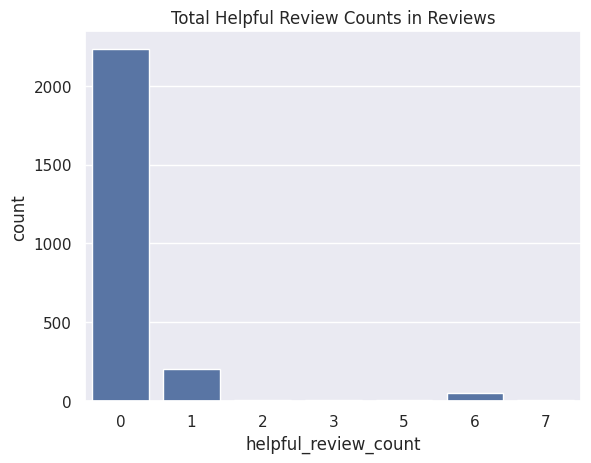

In [32]:
sns.set_style('darkgrid')
#COUNTPLOT ON TOTAL HELPFUL_REVIEW_COUNTS
sns.countplot(x ='helpful_review_count', data = df).set_title("Total Helpful Review Counts in Reviews")
plt.show()


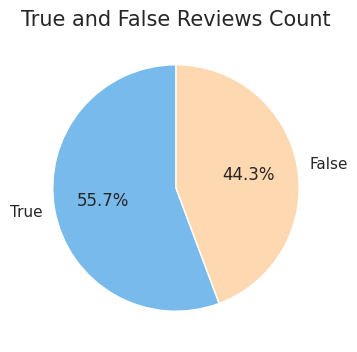

In [33]:
colors = ['#79BAEC','#FED8B1']
plt.figure(figsize=(4,4))
label = df['verified_purchase'].value_counts()
plt.pie(label.values,colors = colors, labels=label.index, autopct= '%1.1f%%', startangle=90)
plt.title('True and False Reviews Count', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Review_Rating Grouped by Verified_Purchase')

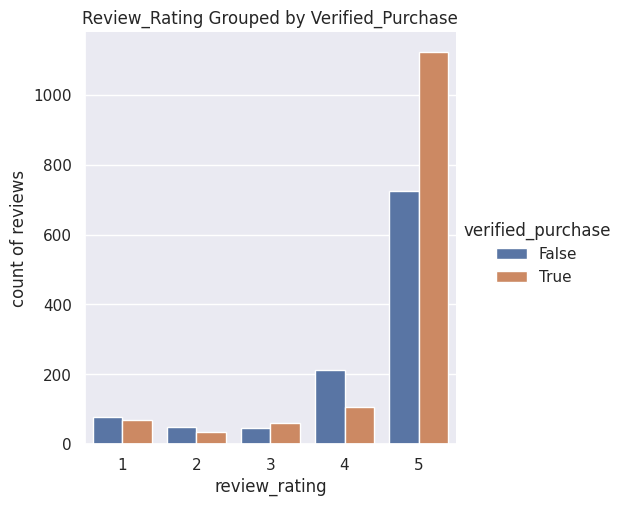

In [34]:
#COUNTPLOT OF REVIEW RATING GROUPED BY VERIFIED PURCHASE
sns.catplot(x ='review_rating',kind="count", hue="verified_purchase",data=df)
plt.xlabel("review_rating")
plt.ylabel("count of reviews")
plt.title("Review_Rating Grouped by Verified_Purchase")

Text(0.5, 1.0, 'Count of Product Categories')

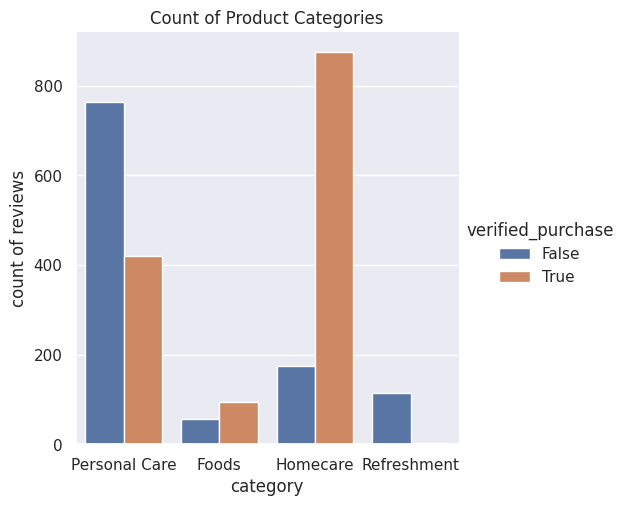

In [35]:
sns.catplot(x ='category',kind="count", hue = "verified_purchase", data=df)
plt.xlabel("category")
plt.ylabel("count of reviews")
plt.title("Count of Product Categories")

Text(0.5, 1.0, 'Count of Product Sub Categories')

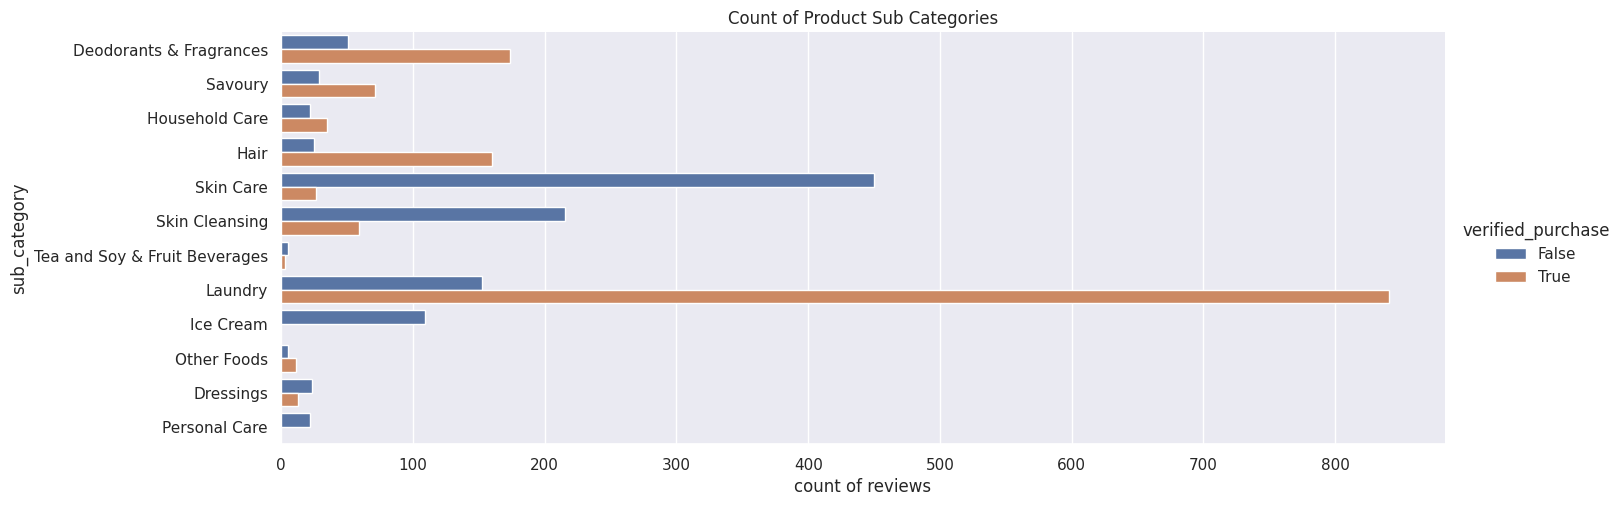

In [36]:
sns.catplot(y ='sub_category',kind="count", hue = "verified_purchase", data=df,  height=5, aspect=3)
plt.ylabel("sub_category")
plt.xlabel("count of reviews")
plt.title("Count of Product Sub Categories")

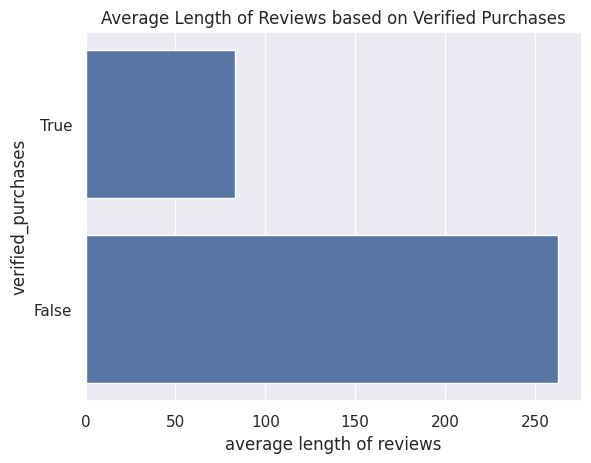

In [37]:
cols = ["verified_purchase", "review_text"]
vprt = df[cols] #making a subset of the dataframe-

#FILTERING BASED ON TRUE AND FALSE VP
checkTrue = vprt["verified_purchase"] == True
filtered_true = vprt[checkTrue]

checkFalse = vprt["verified_purchase"] == False
filtered_false = vprt[checkFalse]

false_average_length = filtered_false["review_text"].apply(len).mean()
true_average_length = filtered_true["review_text"].apply(len).mean()

x = [true_average_length,false_average_length]
y = ["True", "False"]
sns.barplot(x=x, y=y)
plt.xlabel("average length of reviews")
plt.ylabel("verified_purchases")
plt.title("Average Length of Reviews based on Verified Purchases")
plt.show()

In [38]:
df.drop(['matched_keywords', 'time_of_publication'
         ,'manufacturers_response', 'dimension4',
         'dimension5', 'dimension6',
         'is_competitor', 'helpful_review_count',
        'report_date','online_store','brand',
         'category','sub_category', 'market',
        'upc', 'retailer_product_code', 'review_hash_id',
         'url','product_description', 'parent_review',
         'review_type', 'manufacturer', 'dimension1',
         'dimension2','dimension3','dimension4',
         'dimension5', 'dimension7',
         'dimension8'], axis=1, inplace=True)
df.head() #UPDATED DATAFRAME

,review_date,review_rating,review_title,review_text,verified_purchase
0,01-01-2019,5,Dove Mens + Deodorant,"As you get older, you know what you like and w...",True
1,01-02-2019,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,True
2,01-02-2019,4,Vitamin B12.,Excellent,True
3,01-02-2019,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,True
4,01-02-2019,5,Very handy,Does what is says it does,False


In [39]:
df.to_csv('/content/drive/MyDrive/amazonreviews.csv')

In [40]:
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import  PorterStemmer
import string
import re
import warnings
warnings.simplefilter("ignore")

In [41]:
df.head()

,review_date,review_rating,review_title,review_text,verified_purchase
0,01-01-2019,5,Dove Mens + Deodorant,"As you get older, you know what you like and w...",True
1,01-02-2019,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,True
2,01-02-2019,4,Vitamin B12.,Excellent,True
3,01-02-2019,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,True
4,01-02-2019,5,Very handy,Does what is says it does,False


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   review_date        2501 non-null   object
 1   review_rating      2501 non-null   int64 
 2   review_title       2396 non-null   object
 3   review_text        2501 non-null   object
 4   verified_purchase  2501 non-null   bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 80.7+ KB


In [43]:
dup = df.duplicated().sum()
print("Number of duplicates in dataset: ", dup)

Number of duplicates in dataset:  783


In [44]:
df = df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   review_date        1718 non-null   object
 1   review_rating      1718 non-null   int64 
 2   review_title       1650 non-null   object
 3   review_text        1718 non-null   object
 4   verified_purchase  1718 non-null   bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 55.5+ KB


In [45]:
df.isnull().sum()

review_date           0
review_rating         0
review_title         68
review_text           0
verified_purchase     0
dtype: int64

In [46]:
#DROP review_title
df.drop(["review_title","review_date"], axis=1, inplace=True)
df.head()

,review_rating,review_text,verified_purchase
0,5,"As you get older, you know what you like and w...",True
1,5,Three gigantic marmite jars that will last pro...,True
2,4,Excellent,True
3,5,A great flavour top - up for slow cooking.,True
4,5,Does what is says it does,False


#EDA on review_text


In [47]:
nltk.download('stopwords')
#WORD COUNT
df['total words'] = df['review_text'].apply(lambda i: len(str(i).split(" ")))

#CHARACTER COUNT
df['total characters'] = df['review_text'].str.len() #spaces are included

#STOPWORDS COUNT
sw = set(stopwords.words('english'))
df['total stopwords'] = df['review_text'].str.split().apply(lambda i: len(set(i) & sw))

#PUNCTUATION AND SPECIAL CHARA COUNT
count_p = lambda p1,p2: sum([1 for i in p1 if i in p2])
df['total punctuations'] = df.review_text.apply(lambda p: count_p(p, string.punctuation))

#UPPERCASE CHARA COUNT
df['total uppercases'] = df['review_text'].str.findall(r'[A-Z]').str.len()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [48]:
df.head()

,review_rating,review_text,verified_purchase,total words,total characters,total stopwords,total punctuations,total uppercases
0,5,"As you get older, you know what you like and w...",True,39,202,10,7,5
1,5,Three gigantic marmite jars that will last pro...,True,30,175,7,6,4
2,4,Excellent,True,1,9,0,0,1
3,5,A great flavour top - up for slow cooking.,True,9,42,2,2,1
4,5,Does what is says it does,False,6,25,4,0,1


In [49]:
df.describe()

,review_rating,total words,total characters,total stopwords,total punctuations,total uppercases
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,4.441793,33.198487,177.759022,9.257858,4.434226,3.710128
std,1.123083,35.251879,189.713704,8.538609,5.177685,4.209264
min,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000
25%,4.000000,7.000000,41.000000,2.000000,1.000000,1.000000
50%,5.000000,21.000000,113.500000,7.000000,3.000000,2.000000
75%,5.000000,50.000000,268.750000,15.000000,7.000000,5.000000
max,5.000000,287.000000,1624.000000,48.000000,42.000000,54.000000


In [50]:
print(df.groupby("verified_purchase").describe())

                  review_rating                                               \
                          count      mean       std  min  25%  50%  75%  max   
verified_purchase                                                              
False                     900.0  4.315556  1.187805  1.0  4.0  5.0  5.0  5.0   
True                      818.0  4.580685  1.030249  1.0  5.0  5.0  5.0  5.0   

                  total words                                               \
                        count       mean        std  min   25%   50%   75%   
verified_purchase                                                            
False                   900.0  50.271111  36.854098  1.0  23.0  48.0  63.0   
True                    818.0  14.414425  21.041211  1.0   3.0   8.0  17.0   

                         total characters                               \
                     max            count        mean         std  min   
verified_purchase                                           

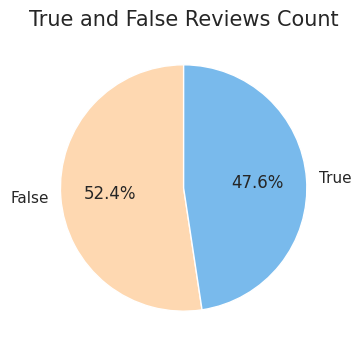

In [51]:
#PIE CHART ON VERFIED PURCHASES -two
colors = ['#FED8B1','#79BAEC']
plt.figure(figsize=(4,4))
label = df['verified_purchase'].value_counts()
plt.pie(label.values,colors = colors, labels=label.index, autopct= '%1.1f%%', startangle=90)
plt.title('True and False Reviews Count', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Review_Rating Grouped by Verified_Purchase')

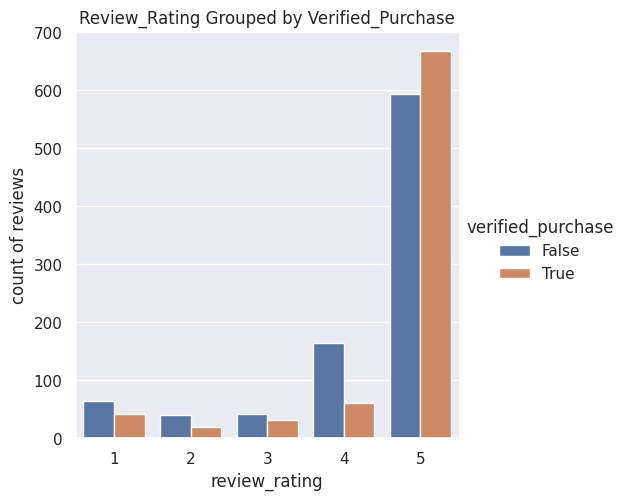

In [52]:
sns.catplot(x ='review_rating',kind="count", hue="verified_purchase", data=df)
plt.xlabel("review_rating")
plt.ylabel("count of reviews")
plt.title("Review_Rating Grouped by Verified_Purchase")

#Pre-Processing

In [53]:
#DROP UNNECESSARY COLUMNS
df.drop(["total words","total characters",
         "total stopwords","total punctuations",
         "total uppercases","review_rating"], axis=1, inplace=True)
df.head()

,review_text,verified_purchase
0,"As you get older, you know what you like and w...",True
1,Three gigantic marmite jars that will last pro...,True
2,Excellent,True
3,A great flavour top - up for slow cooking.,True
4,Does what is says it does,False


In [54]:
#CORRECT SPELLING
df.review_text.apply(lambda i: ''.join(TextBlob(i).correct()))

0       Is you get older, you know what you like and w...
1       Three gigantic marie wars that will last proba...
2                                               Excellent
3              A great flavour top - up for slow cooking.
4                               Does what is says it does
5                             Excellent item.Good for men
6                                Thank you Im very happy
7                                               Beautiful
8                                 Always buy. Fig bottles
9       Always use this product on my heavily mistreat...
10                                            Great value
11      Its not the one in the picture, but gets 5 st...
12      Stem as described, excellent quality, rapid de...
13             Good body wash but not a very strong smell
14                                                  Great
15                                              North it!
16      I remember trying this at a friends house year...
17            

In [55]:
#REMOVING THE STOPWORDS,PUNCTUATIONS, LOWERCASING, AND STEMMING OF THE SENTENCES
def text_preprocessing(text):
    removed_special_characters = re.sub("[^a-zA-Z]", " ", str(text))
    tokens = removed_special_characters.lower().split()

    stemmer = PorterStemmer()
    cleaned = []
    stemmed = []

    for token in tokens:
        if token not in sw:
            cleaned.append(token)

    for token in cleaned:
        token = stemmer.stem(token)
        stemmed.append(token)

    return " ".join(stemmed)
df['review_text'] = df['review_text'].apply(text_preprocessing)
df['review_text'].head()

0    get older know like suitabl bodi like dove pro...
1    three gigant marmit jar last probabl whole lif...
2                                                excel
3                          great flavour top slow cook
4                                                  say
Name: review_text, dtype: object

In [56]:
#CHECK RARE WORDS
r = pd.Series(' '.join(df['review_text']).split()).value_counts()[-10:]
print("RARE WORDS:")
print(r)

RARE WORDS:
accident     1
chuck        1
emigr        1
salt         1
mushroom     1
fli          1
cult         1
revitalis    1
advantag     1
tendon       1
Name: count, dtype: int64


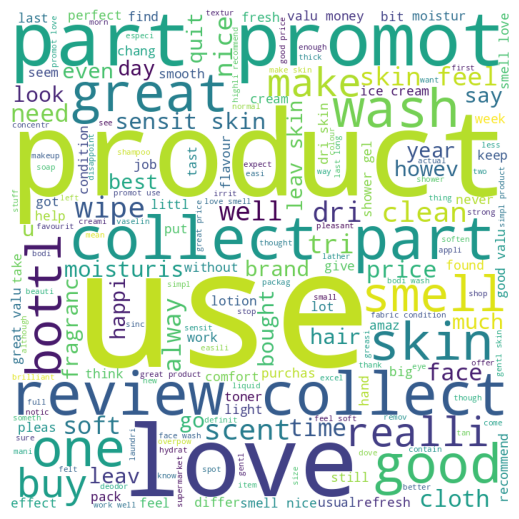

In [57]:
#CHECK TOP COMMON WORDS
words = ''
for i in df["review_text"]:
    tokens = i.split()
    words += " ".join(tokens)+" "


word_cloud = WordCloud(width = 700, height = 700,
                       background_color ='white',
                       min_font_size = 10).generate(words)
plt.figure(figsize = (5, 5))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [58]:
#removing common and rare words
common = pd.Series(' '.join(df['review_text']).split()).value_counts()[:3]
common = list(common.index)
df['review_text'] = df['review_text'].apply(lambda i: " ".join(i for i in i.split() if i not in common))

rare = pd.Series(' '.join(df['review_text']).split()).value_counts()[-3:]
rare = list(rare.index)
df['review_text'] = df['review_text'].apply(lambda i: " ".join(i for i in i.split() if i not in rare))

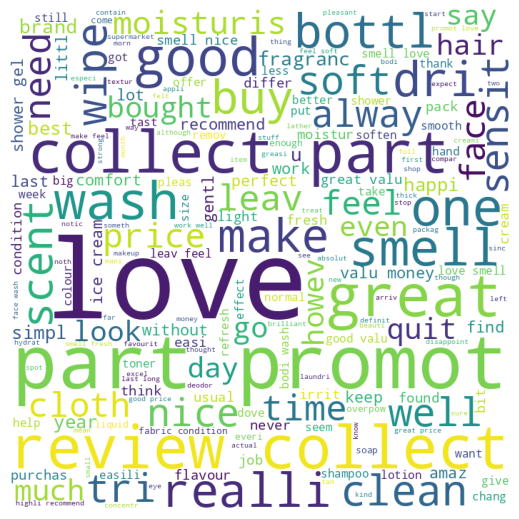

In [59]:
#WORDCLOUD - UPDATED TOP WORDS
words = ''
for i in df["review_text"]:
    tokens = i.split()
    words += " ".join(tokens)+" "


word_cloud = WordCloud(width = 700, height = 700, background_color ='white', min_font_size = 10).generate(words)
plt.figure(figsize = (5, 5))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [60]:
nltk.download('punkt')
df['review_text'].apply(word_tokenize).head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0    [get, older, know, like, suitabl, bodi, like, ...
1    [three, gigant, marmit, jar, last, probabl, wh...
2                                              [excel]
3                    [great, flavour, top, slow, cook]
4                                                [say]
Name: review_text, dtype: object

In [61]:
#SAVING UPDATED DATAFRAME AS .csv FILE
df.to_csv('/content/drive/MyDrive/amazonreviews.csv')

In [62]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle
import warnings
warnings.simplefilter("ignore")

In [63]:
#lOADING DATASETS
df = pd.read_csv("amazonreviews.csv",encoding="latin1") #due to special charas should be encoded as latin 1
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#DROP EXTRA COLUMNS
df.drop(['Unnamed: 0'], axis=1, inplace=True)
# toCheck.drop(['Unnamed: 0'], axis=1, inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'amazonreviews.csv'

In [ ]:
df.iloc[[191,523,1072,1111,1230,1316]]


In [ ]:
print(X_train.isna().sum())Q

In [ ]:
df = df.dropna(how='any',axis=0)

In [ ]:
df.iloc[[191,523,1072,1111,1230,1316]]


In [ ]:
df["verified_purchase"].value_counts(normalize=True)

In [ ]:
#ASSIGN THE VARIABLES
X = df['review_text'] #input var
y = df['verified_purchase'] #target var

In [ ]:
#SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(
    df['review_text'], df['verified_purchase'],test_size=0.4, random_state=42) #40% gives best results, 42 is no of life...

entiredf = format(df.shape[0])
traindf = format(X_train.shape[0])
testdf = format(X_test.shape[0])

print('Number of rows:')
print('Entire dataset:', entiredf)
print('Train dataset:', traindf)
print('Test dataset:',testdf)

In [ ]:
count_vectorizer  = CountVectorizer(stop_words='english')
count_vectorizer.fit(X_train)
print('\nVocabulary: \n', count_vectorizer.vocabulary_)

train_c = count_vectorizer.fit_transform(X_train)
test_c = count_vectorizer.transform(X_test)

In [ ]:
count_vectorizer  = CountVectorizer(stop_words='english')
count_vectorizer.fit(X_train)
print('\nVocabulary: \n', count_vectorizer.vocabulary_)

train_c = count_vectorizer.fit_transform(X_train)
test_c = count_vectorizer.transform(X_test)

SVM WITH COUNT

In [ ]:
#IMPLEMENTING AND RUNNNING SVM MODEL - COUNT
svm1 = SVC(kernel='linear')
svm1.fit(train_c, y_train)
prediction = svm1.predict(test_c)

In [ ]:
#EVALUATION
svm_a1 = accuracy_score(y_test, prediction)*100
svm_p1 = precision_score(y_test, prediction)* 100
svm_r1 = recall_score(y_test, prediction)*100
svm_f11 = f1_score(y_test, prediction)*100


In [ ]:
# prompt: print classification report

print("SVM Classification Report:")
print("Accuracy:", svm_a1)
print("Precision:", svm_p1)
print("Recall:", svm_r1)
print("F1 Score:", svm_f11)


In [ ]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=svm1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm1.classes_)
display.plot()

MULTINOMIAL with count

In [ ]:
#IMPLEMENTING AND RUNNNING MNB MODEL - COUNT
mnb1 = MultinomialNB()
mnb1.fit(train_c, y_train)
prediction = mnb1.predict(test_c)

In [ ]:
mnb_a1 = accuracy_score(y_test, prediction)*100
mnb_p1 = precision_score(y_test, prediction)* 100
mnb_r1 = recall_score(y_test, prediction)*100
mnb_f11 = f1_score(y_test, prediction)*100
print(mnb_a1)
print(mnb_p1)
print(mnb_r1)
print(mnb_f11)

In [ ]:
cm =  confusion_matrix(y_test, prediction, labels=mnb1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mnb1.classes_)
display.plot()

knn with count


---



---



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=100)
rf1.fit(train_c, y_train)
prediction = rf1.predict(test_c)

In [ ]:
rf_a1 = accuracy_score(y_test, prediction)*100
rf_p1 = precision_score(y_test, prediction)* 100
rf_r1 = recall_score(y_test, prediction)*100
rf_f11 = f1_score(y_test, prediction)*100
print(rf_a1)
print(rf_p1)
print(rf_r1)
print(rf_f11)
cm =  confusion_matrix(y_test, prediction, labels=rf1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf1.classes_)
display.plot()


TFIDF VECTORIZER AND MODELING
We examine the total document weightage of a word in TfidfVectorizer. It assists us in coping with the most common terms. We may use it to penalize them. The word counts are weighted by a measure of how frequently they appear in the documents in TfidfVectorizer.

In [ ]:
#term frequency and inverse document frequency
TFIDF_vectorizer  = TfidfVectorizer(stop_words='english')

TFIDF_vectorizer.fit(X_train)
print('\nVocabulary: \n', TFIDF_vectorizer.vocabulary_)

train_tf = TFIDF_vectorizer.fit_transform(X_train)
test_tf = TFIDF_vectorizer.transform(X_test)

Multinomial Naive Bayes model

In [ ]:
mnb2 = MultinomialNB()
mnb2.fit(train_tf, y_train)
prediction = mnb2.predict(test_tf)

In [ ]:
#EVALUATION
mnb_a2 = accuracy_score(y_test, prediction)*100
mnb_p2 = precision_score(y_test, prediction)* 100
mnb_r2 = recall_score(y_test, prediction)*100
mnb_f12 = f1_score(y_test, prediction)*100
print(mnb_a2)
print(mnb_p2)
print(mnb_r2)
print(mnb_f12)

In [ ]:
cm =  confusion_matrix(y_test, prediction, labels=mnb2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mnb2.classes_)
display.plot()

Support Vector Machine model


In [ ]:
svm2 = SVC(kernel='linear')
svm2.fit(train_tf, y_train)
prediction = svm2.predict(test_tf)

In [ ]:
svm_a2 = accuracy_score(y_test, prediction)*100
svm_p2 = precision_score(y_test, prediction)* 100
svm_r2 = recall_score(y_test, prediction)*100
svm_f12 = f1_score(y_test, prediction)*100
print(svm_a2)
print(svm_p2)
print(svm_r2)
print(svm_f12)

In [ ]:
cm =  confusion_matrix(y_test, prediction, labels=svm2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm2.classes_)
display.plot()

cm =  confusion_matrix(y_test, prediction, labels=svm2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm2.classes_)
display.plot()

RANDOM FOREST

In [ ]:
rf2 = RandomForestClassifier(n_estimators=100)
rf2.fit(train_tf, y_train)
prediction = rf2.predict(test_tf)

In [ ]:
rf_a2 = accuracy_score(y_test, prediction)*100
rf_p2 = precision_score(y_test, prediction)* 100
rf_r2 = recall_score(y_test, prediction)*100
rf_f12 = f1_score(y_test, prediction)*100
print(rf_a2)
print(rf_p2)
print(rf_r2)
print(rf_f12)

In [ ]:
cm =  confusion_matrix(y_test, prediction, labels=rf2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf2.classes_)
display.plot()

In [ ]:
model_accuracy={'MNB': [round(mnb_a1), round(mnb_a2)],
                'SVM': [round(svm_a1), round(svm_a2)],
                'RF':[round(rf_a1),round(rf_a2)]
               }
ma = pd.DataFrame(model_accuracy, columns = ['MNB','SVM','RF'], index=['Count Vectorizer','Tfidf Vectorizer'])
ma

ENSEMBLE MODEL


VOTING CLASSIFIER

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split